In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!pip install plotly
import plotly.offline as py 
import plotly.graph_objs as go
import plotly.express as px
from collections import Counter  
from subprocess import call
from IPython.display import Image
############################################################################################
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score

In [2]:
claims=pd.read_csv('insurance_claims.csv',index_col=0)
print("The dataset is {} insurance claims".format(len(claims)))

The dataset is 1000 insurance claims


In [3]:
claims.head(10)

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,,,,,,,,,,,,,,,,,,,,,
328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
228,42,342868,27/6/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
256,41,227811,25/5/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
256,39,104594,12/10/2006,OH,250/500,1000,1351.10,0,478456,FEMALE,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
137,34,413978,4/6/2000,IN,250/500,1000,1333.35,0,441716,MALE,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
165,37,429027,3/2/1990,IL,100/300,1000,1137.03,0,603195,MALE,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
27,33,485665,5/2/1997,IL,100/300,500,1442.99,0,601734,FEMALE,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N


In [4]:
claims.describe()

,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [5]:
claims.tail(10)

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,,,,,,,,,,,,,,,,,,,,,
286,43,663190,5/2/1994,IL,100/300,500,1564.43,3000000,477644,FEMALE,...,2,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N
257,44,109392,12/7/2006,OH,100/300,1000,1280.88,0,433981,MALE,...,1,NO,46980,0,5220,41760,Accura,TL,2002,N
94,26,215278,24/10/2007,IN,100/300,500,722.66,0,433696,MALE,...,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N
124,28,674570,8/12/2001,OH,250/500,1000,1235.14,0,443567,MALE,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
141,30,681486,24/3/2007,IN,500/1000,1000,1347.04,0,430665,MALE,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
3,38,941851,16/7/1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
285,41,186934,5/1/2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
130,34,918516,17/2/2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
458,62,533940,18/11/2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [6]:
claims.columns

Index(['age', 'policy_number', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [7]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 328 to 456
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1000 non-null   int64  
 1   policy_number                1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relations

In [8]:
#identifying unique data for each feature
def unique_value(data_set, column_name):
    return data_set[column_name].nunique()

print("Number of the Unique Values:")
print(unique_value(claims,list(claims.columns)))

Number of the Unique Values:
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3

In [9]:
import warnings
warnings.filterwarnings('ignore') # This  function ignores any warnings that are displayed

In [10]:
# Handling missing values 

def missing_value_table(claims):
    missing_value = claims.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * claims.isna().sum()//len(claims)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightblue", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(claims)

,Missing Values,% Value
age,0,0
witnesses,0,0
incident_state,0,0
incident_city,0,0
incident_location,0,0
incident_hour_of_the_day,0,0
number_of_vehicles_involved,0,0
property_damage,0,0
bodily_injuries,0,0
police_report_available,0,0


In [11]:
print(np.unique(claims['police_report_available']))

['?' 'NO' 'YES']


In [12]:

print(np.unique(claims['fraud_reported']))

['N' 'Y']


### Perform feature selection

In [14]:
# Importing additional libraries neccessary for the task at hand 

import scipy.stats as ss
from collections import Counter
import math 
from matplotlib import pyplot as plt
from scipy import stats
from IPython.display import display, Markdown, Latex

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded_claims = claims.copy()
for col in label_encoded_claims.select_dtypes(include='O').columns:
    label_encoded_claims[col]=le.fit_transform(label_encoded_claims[col])

In [16]:
label_encoded_claims.head()
claims = label_encoded_claims

In [17]:
feature_name = list(claims.columns)
# no of maximum features we need to select
num_feats= 20

In [19]:
claims.isna().sum()

age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [20]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 328 to 456
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1000 non-null   int64  
 1   policy_number                1000 non-null   int64  
 2   policy_bind_date             1000 non-null   int32  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   int32  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relations

In [21]:
y = claims['total_claim_amount']>=20000
X = claims.copy()
del X['total_claim_amount']

In [22]:
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats= 20

In [23]:
X.head()

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,,,,,,,,,,,,,,,,,,,,,
328,48,521585,243,2,1,1000,1406.91,0,466132,1,...,1,2,2,6510,13020,52080,10,1,2004,1
228,42,342868,591,1,1,2000,1197.22,5000000,468176,1,...,0,0,0,780,780,3510,8,12,2007,1
134,29,687698,851,2,0,2000,1413.14,5000000,430632,0,...,2,3,1,7700,3850,23100,4,30,2007,0
256,41,227811,541,0,1,2000,1415.74,6000000,608117,0,...,1,2,1,6340,6340,50720,3,34,2014,1
228,44,367455,846,0,2,1000,1583.91,6000000,610706,1,...,0,1,1,1300,650,4550,0,31,2009,0


##### 1. Pearson correlation

In [24]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

20 selected features


In [25]:
cor_feature

['auto_make',
 'auto_year',
 'auto_model',
 'capital-gains',
 'umbrella_limit',
 'insured_zip',
 'age',
 'insured_education_level',
 'incident_state',
 'policy_csl',
 'fraud_reported',
 'authorities_contacted',
 'incident_hour_of_the_day',
 'incident_type',
 'number_of_vehicles_involved',
 'incident_severity',
 'injury_claim',
 'property_claim',
 'collision_type',
 'vehicle_claim']

In [26]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)

### 2. Recursive Feature Elimination

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 37 features.
Fitting estimator with 27 features.


RFE(estimator=LogisticRegression(), n_features_to_select=20, step=10, verbose=5)

In [28]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

20 selected features


In [29]:
rfe_feature

['age',
 'policy_number',
 'policy_bind_date',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'insured_education_level',
 'insured_occupation',
 'capital-gains',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_model',
 'fraud_reported']

### 3. Chi-Square Features

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

20 selected features


In [31]:
chi_feature

['age',
 'policy_csl',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'capital-gains',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'fraud_reported']

## Machine Learning: Splitting the data into Training and Testing sample

In [99]:
# cor_feature = pd.DataFrame(claims[chi_feature])
cor_feature = pd.DataFrame(claims)
# rfe_feature
# chi_feature


In [100]:
cor_feature.columns

Index(['age', 'policy_number', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [82]:
TargetVariable = 'fraud_reported'

In [101]:
Predictors = ['age', 'policy_number', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported']

In [102]:
X=cor_feature[Predictors].values
y=cor_feature[TargetVariable].values

In [103]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

#### Standardization/Normalization of data

In [104]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

In [105]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 38)
(800,)
(200, 38)
(200,)


In [106]:
#Train and test split
from sklearn.model_selection import train_test_split
Y = cor_feature['fraud_reported']
X = cor_feature.drop('fraud_reported',axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=.20)


# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

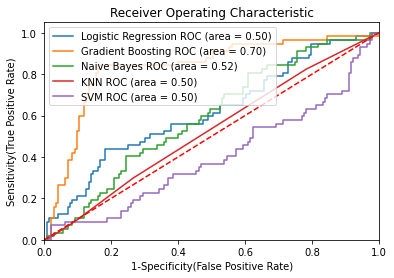

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(),    
},
{
    'label': 'SVM',
    'model': SVC(random_state=0,probability=True),    
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="upper left")
plt.show()   # Display

In [109]:
## training our models. It also shows you how to grab probabilities for the positive class:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_xg = XGBClassifier().fit(X_train, y_train)
probs_xg = model_xg.predict_proba(X_test)[:, 1]

model_knn = KNeighborsClassifier().fit(X_train, y_train)
probs_knn = model_knn.predict_proba(X_test)[:, 1]

model_nb = GaussianNB().fit(X_train, y_train)
probs_nb = model_nb.predict_proba(X_test)[:, 1]

model_svc = SVC(random_state=0,probability=True).fit(X_train, y_train)
probs_svc = model_svc.predict_proba(X_test)[:, 1]

[16:24:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [110]:
# obtaining the values for precision, recall, and AUC (Area Under the Curve) for every model next. 
# The only requirement is to remap the Good and Bad class names to 1 and 0, respectively

from sklearn.metrics import auc, precision_recall_curve

y_test_int = y_test.replace({'Good': 1, 'Bad': 0})

baseline_model = sum(y_test_int == 1) / len(y_test_int)

precision_lr, recall_lr, _ = precision_recall_curve(y_test_int, probs_lr)
auc_lr = auc(recall_lr, precision_lr)

precision_xg, recall_xg, _ = precision_recall_curve(y_test_int, probs_xg)
auc_xg = auc(recall_xg, precision_xg)

precision_knn, recall_knn, _ = precision_recall_curve(y_test_int, probs_knn)
auc_knn = auc(recall_knn, precision_knn)

precision_nb, recall_nb, _ = precision_recall_curve(y_test_int, probs_nb)
auc_nb = auc(recall_nb, precision_nb)

precision_svc, recall_svc, _ = precision_recall_curve(y_test_int, probs_svc)
auc_svc = auc(recall_svc, precision_svc)

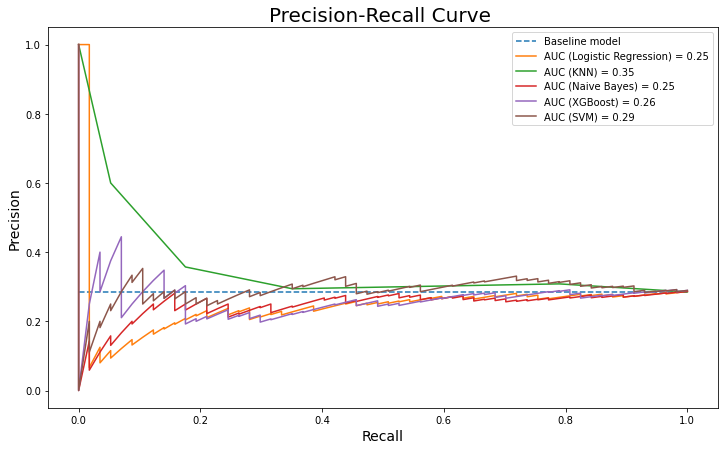

In [112]:
plt.figure(figsize=(12, 7))
plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')
# plt.plot(recall_lr, precision_lr, label=f'AUC (Logistic Regression) = 0.74')
plt.plot(recall_lr, precision_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
# plt.plot(recall_knn, precision_knn, label=f'AUC (KNN) = 0.66')
plt.plot(recall_knn, precision_knn, label=f'AUC (KNN) = {auc_knn:.2f}')
plt.plot(recall_nb, precision_nb, label=f'AUC (Naive Bayes) = {auc_nb:.2f}')
# plt.plot(recall_nb, precision_nb, label=f'AUC (Naive Bayes) = 0.63')
plt.plot(recall_xg, precision_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
# plt.plot(recall_xg, precision_xg, label=f'AUC (XGBoost) = 0.75')
plt.title('Precision-Recall Curve ', size=20)
plt.plot(recall_svc, precision_svc, label=f'AUC (SVM) = {auc_svc:.2f}')
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend();

### Logistic Regression

In [113]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       143
           1       0.00      0.00      0.00        57

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.60       200

[[143   0]
 [ 57   0]]
Accuracy of the model on Testing Sample Data: 0.6

Accuracy values for 10-fold Cross Validation:
 [0.75341131 0.79877055 0.75341131 0.74659771 0.671875   0.66374269
 0.69135365 0.79193739 0.721079   0.7716388 ]

Final Average Accuracy of the model: 0.74


### Xtreme Gradient Boosting (XGBoost)

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
[16:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  

<AxesSubplot:>

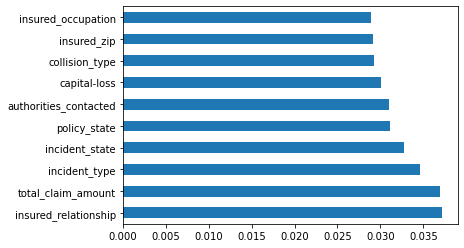

In [114]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### K-Nearest Neighbor(KNN)

In [115]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       143
           1       0.38      0.18      0.24        57

    accuracy                           0.69       200
   macro avg       0.56      0.53      0.52       200
weighted avg       0.63      0.69      0.64       200

[[127  16]
 [ 47  10]]
Accuracy of the model on Testing Sample Data: 0.64

Accuracy values for 10-fold Cross Validation:
 [0.62149103 0.67902351 0.6790094  0.68531469 0.60625    0.61541219
 0.64335664 0.656      0.58694639 0.63451158]

Final Average Accuracy of the model: 0.64


### Support Vector Machines(SVM)

In [116]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline

# Plotting the feature importance for Top 10 most important columns
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=2, gamma=0.1)
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       143
           1       0.00      0.00      0.00        57

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.60       200

[[143   0]
 [ 57   0]]
Accuracy of the model on Testing Sample Data: 0.6

Accuracy values for 10-fold Cross Validation:
 [0.64285714 0.64285714 0.64285714 0.64285714 0.64285714 0.64285714
 0.64285714 0.65636364 0.65636364 0.65636364]

Final Average Accuracy of the model: 0.65


### Naive Bays

In [117]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       143
           1       0.00      0.00      0.00        57

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.59       200

[[142   1]
 [ 57   0]]
Accuracy of the model on Testing Sample Data: 0.59

Accuracy values for 10-fold Cross Validation:
 [0.66374269 0.70629371 0.64       0.63620072 0.56451613 0.62474012
 0.66474919 0.76586967 0.67416017 0.60007233]

Final Average Accuracy of the model: 0.65
